# Clusterverfahren: k-Means
In diesem Kapitel geht es um "nicht überwachtes Lernen". Neben dem *Agglomerativen Hierarchischen Linkage Average Clustering* betrachten wir hier das Verfahren *k-Means*. Wie üblich beginnen wir wieder mit einem einfachen Beispiel, das das Prinzip des k-Means-Algorithmus verdeutlicht. Zuerst erstellen wir ein Pandas DataFrame.

In [1]:
import pandas as pd

df = pd.DataFrame({"Attribut1" : [1,2,4,5],
                  "Attribut2" : [1,1,3,4]})

df

,Attribut1,Attribut2
0,1,1
1,2,1
2,4,3
3,5,4


Wir erstellen ein Modell mit Hilfe der Funktion *KMeans". Wichtig bei k-Means ist, dass wir den Hyperparameter k definieren müssen: Die Anzahl der Cluster, die gebildet werden sollen. Hier setzen wir k auf 2.

In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2).fit(df)

Wir können die ermittelten Center-Punkte ausgeben. Ein Hinweis: Methoden, die mit einem Underscore "_" enden, können erst *nach* dem Trainieren des Modells aufgerufen werden (also der Funktion *fit*).

In [3]:
model.cluster_centers_

array([[4.5, 3.5],
       [1.5, 1. ]])

Wir plotten unseren kleinen Datensatz und zeichnen die Centerpunkte ein. Vorher rufen wir noch die *predict* - Methode auf, um die Punkte je nach Clusterzugehörigkeit einzufärben.

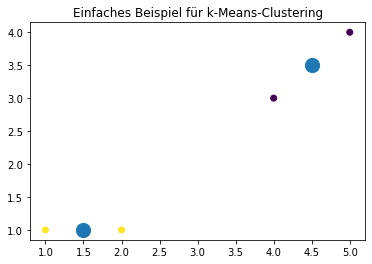

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

pred = model.predict(df)

plt.scatter(df.Attribut1, df.Attribut2, c=pred)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=200)
plt.title("Einfaches Beispiel für k-Means-Clustering")
plt.show()

## Beispiel mit dem Datensatz *IRIS*
Im folgenden Beispiel wenden wir dies auf den IRIS-Datensatz an. Wir erstellen 3 Cluster, da es 3 verschiedene IRIS-Spezies gibt. Wir färben die Punkte wieder abhängig von ihrem Cluster ein. Da wir einen 2D-Plot ausgeben, können wir nicht alle Features unmittelbar ausgeben (das wären 4 Dimensionen), stattdessen addieren wir die jeweiligen Längen- und Breiten der Blätter. Wir erkennen recht gut, dass es einen Überlappungsbereich zwischen den Spezies Versicolor und Virginica gibt, während Setosa sehr gut separiert werden kann.

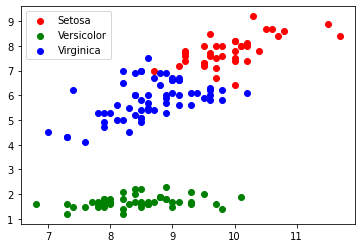

In [5]:
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/troescherw/"
url += "datasets/master/iris.csv"

iris = pd.read_csv(url, delimiter=";", usecols=[0,1,2,3,4], index_col=4)

model = KMeans(n_clusters=3).fit(iris)

# Datensatz mit Spalte für die Clusterzuordnung erweitern
iris["Cluster"] = model.predict(iris)

# Plotten
plt.scatter(iris.loc[iris.Cluster==0].Sepal_Length+iris.loc[iris.Cluster==0].Sepal_Width,
            iris.loc[iris.Cluster==0].Petal_Length+iris.loc[iris.Cluster==0].Petal_Width, c="r", label="Setosa")
plt.scatter(iris.loc[iris.Cluster==1].Sepal_Length+iris.loc[iris.Cluster==1].Sepal_Width,
            iris.loc[iris.Cluster==1].Petal_Length+iris.loc[iris.Cluster==1].Petal_Width, c="g", label="Versicolor")
plt.scatter(iris.loc[iris.Cluster==2].Sepal_Length+iris.loc[iris.Cluster==2].Sepal_Width,
            iris.loc[iris.Cluster==2].Petal_Length+iris.loc[iris.Cluster==2].Petal_Width, c="b", label="Virginica")
plt.legend()
plt.show()



-----------------
## Beispiel: Lebenserwartung in Ländern in Abhängigkeit vom Jahreseinkommen
In diesem Beispiel clustern wir Länder (mit > 30 Mill. Einwohnern) bzgl. der Lebenswerartung und Jahreseinkommen. Wir greifen auf den Datensatz *gapminder* zu (www.gapminder.org):

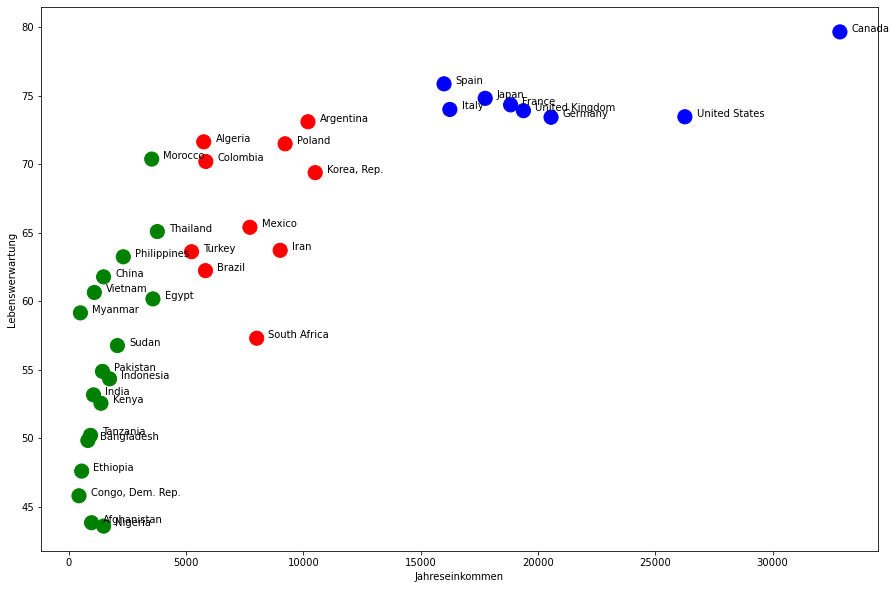

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)

url = "https://raw.githubusercontent.com/troescherw/datasets/master/gapminder.csv"
df = pd.read_csv(url, usecols=["country", "lifeExp", "pop", "gdpPercap"])
df = df.loc[df["pop"] > 30000000]
dfg = df.groupby("country").mean()
df2 = dfg[["lifeExp", "gdpPercap"]]
model = KMeans(n_clusters=3).fit(df2)

colors = pd.DataFrame({"color" : model.predict(df2)})
colors = colors.replace([0,1,2], ["red","green","blue"])
colors.index = dfg.index

dfg = pd.concat([dfg, colors], axis=1, sort=False)

plt.scatter(dfg.gdpPercap, dfg.lifeExp, c=dfg.color, s=200)

for i,label in enumerate(df2.index):
    plt.text(dfg.iloc[i,2]+500, dfg.iloc[i,0], label)
plt.xlabel("Jahreseinkommen")
plt.ylabel("Lebenswerwartung")
    
plt.show()

## Bestimmung von K mittels Elbow-Methode

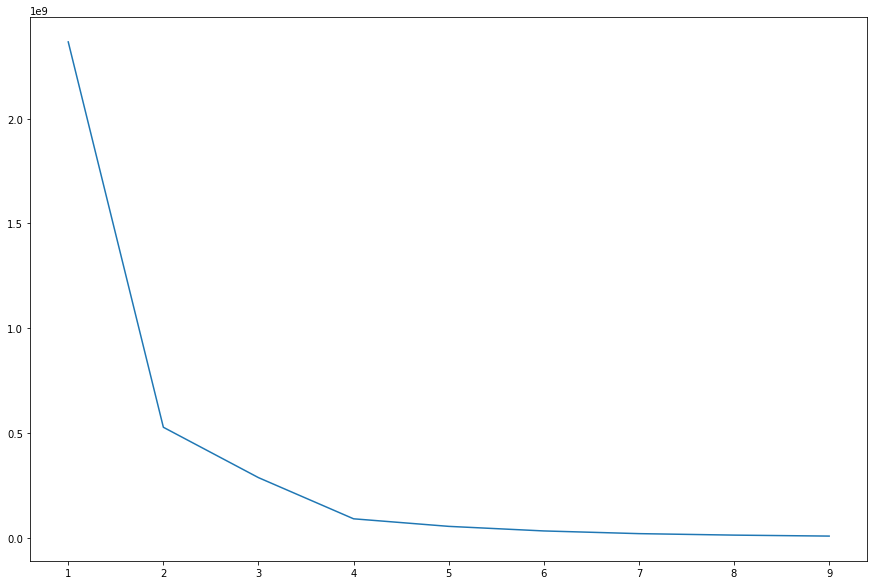

In [7]:
# Berechne Summe der quadrierten Distanzen der Stichproben zu ihren Clustern für verschiedene K
# intertia_ enthält Mittelwert der Summe der quadrierten Abstände (mean sum of squares, mssw)

mssw = [KMeans(n_clusters=k).fit(df2).inertia_ for k in range(1,10)]

plt.plot(range(1,10),mssw)
